In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
 
data = pd.read_csv("/Users/jazis/Downloads/listings.csv") 

#data cleaning from LAB1
#drop redundant info and fields not useful for analysis
sub=data.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered'
              , 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
              'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url',
              'host_picture_url', 'country_code', 'country','amenities', 'minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'availability_30', 'availability_365','availability_90','has_availability',
               'calculated_host_listings_count','calculated_host_listings_count_shared_rooms',
               'is_business_travel_ready','host_about', 'host_acceptance_rate', 'host_total_listings_count',
              'jurisdiction_names','license','monthly_price','square_feet','weekly_price', 'requires_license'], axis=1)
def money_to_decimal(x):
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return float(x)
def rem_percent(x):
    x=x.replace("%","")
    return float(x)/100
def truncate(n):
    return int(n * 1000) / 1000
#converts objects with money values into decimal values to become continous attribute
sub.cleaning_fee = sub.cleaning_fee.astype(str)
sub.extra_people = sub.extra_people.astype(str)
sub.security_deposit = sub.security_deposit.astype(str)
sub.price = sub.price.astype(str)
sub.loc[:,'price'] = sub.loc[:,'price'].apply(money_to_decimal)
sub.loc[:,'cleaning_fee'] = sub.loc[:,'cleaning_fee'].apply(money_to_decimal)
sub.loc[:,'extra_people'] = sub.loc[:,'extra_people'].apply(money_to_decimal)
sub.loc[:,'security_deposit'] = sub.loc[:,'security_deposit'].apply(money_to_decimal)

#imputations
sub['price']=sub.price.mask(sub.price == 0,sub.price.median())
sub.cleaning_fee=sub.cleaning_fee.fillna(sub.cleaning_fee.median())
sub.first_review=sub.first_review.fillna('2019-08-01')
sub['first_review'] =  pd.to_datetime(sub['first_review'],
                              format='%Y-%m-%d')
sub.host_response_rate = sub.host_response_rate.astype(str)
sub.loc[:,'host_response_rate'] = sub.loc[:, 'host_response_rate'].apply(rem_percent)
sub.host_response_rate=sub.host_response_rate.fillna(sub.host_response_rate.median())
sub['host_since'] =  pd.to_datetime(sub['host_since'],
                              format='%Y-%m-%d')
sub.last_review=sub.last_review.fillna('2019-08-01')
sub['last_review'] =  pd.to_datetime(sub['last_review'],
                              format='%Y-%m-%d')
sub.review_scores_accuracy=sub.review_scores_accuracy.fillna(truncate(sub.review_scores_accuracy.median()))
sub.review_scores_checkin=sub.review_scores_checkin.fillna(truncate(sub.review_scores_checkin.median()))
sub.review_scores_cleanliness=sub.review_scores_cleanliness.fillna(truncate(sub.review_scores_cleanliness.median()))
sub.review_scores_communication=sub.review_scores_communication.fillna(truncate(sub.review_scores_communication.median()))
sub.review_scores_location=sub.review_scores_location.fillna(truncate(sub.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
sub.review_scores_value=sub.review_scores_value.fillna(truncate(sub.review_scores_value.median()))
sub.reviews_per_month=sub.reviews_per_month.fillna(sub.reviews_per_month.median())
sub.security_deposit=sub.security_deposit.fillna(sub.security_deposit.median())
sub.bathrooms=sub.bathrooms.fillna(sub.bathrooms.median())
sub.bedrooms=sub.bedrooms.fillna(sub.bedrooms.median())
sub.host_listings_count=sub.host_listings_count.fillna(sub.host_listings_count.median())
sub.beds=sub.beds.fillna(sub.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')


C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
df = sub[~sub['review_scores_rating'].isnull()]
df['perf_score'] = np.where(df['review_scores_rating']==100, 1, 0)
df.perf_score.sum()
df_data=df
###df_data=df.drop('perf_score', axis=1)
##df_data['zipcode'] = df['zipcode'].str.extract('(^\d+)', expand=False)
df_y=df['perf_score']

#create dummy vars
##host_loc = pd.get_dummies(df_data['host_location'],drop_first=True)
host_response = pd.get_dummies(df_data['host_response_time'],drop_first=True)
##host_neigh = pd.get_dummies(df_data['neighbourhood_group_cleansed'],drop_first=True)
##host_verif = pd.get_dummies(df_data['host_verifications'],drop_first=True)
df_data['host_identity_verified'] = pd.get_dummies(df_data['host_identity_verified'],drop_first=True)
##street = pd.get_dummies(df_data['street'],drop_first=True)
##neighborhood = pd.get_dummies(df_data['neighbourhood_group_cleansed'],drop_first=True)
##city = pd.get_dummies(df_data['city'],drop_first=True)
# make into continuous zipcode = pd.get_dummies(x_train['zipcode'],drop_first=True)
##market = pd.get_dummies(df_data['market'],drop_first=True)
df_data['is_location_exact'] = pd.get_dummies(df_data['is_location_exact'],drop_first=True)
prop_type = pd.get_dummies(df_data['property_type'],drop_first=True)
room_type = pd.get_dummies(df_data['room_type'],drop_first=True)
bed_type = pd.get_dummies(df_data['bed_type'],drop_first=True)
df_data['instant_bookable'] = pd.get_dummies(df_data['instant_bookable'],drop_first=True)
cancel = pd.get_dummies(df_data['cancellation_policy'],drop_first=True)
df_data['host_is_superhost'] = pd.get_dummies(df_data['host_is_superhost'],drop_first=True)

df_data.drop(['host_location','host_response_time','host_neighbourhood','host_verifications',
             'host_identity_verified', 'street', 'neighbourhood', 'city', 'market', 
             'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
             'cancellation_policy', 'name', 'host_name', 'host_has_profile_pic', 'neighbourhood_cleansed',
              'neighbourhood_group_cleansed', 'host_neighbourhood', 'smart_location', 'calendar_updated',
             'calendar_last_scraped','require_guest_profile_picture', 'require_guest_phone_verification',
             'host_since', 'first_review', 'last_review', 'state', 'smart_location', 'zipcode','review_scores_rating'],axis=1,inplace=True)

df_data = pd.concat([df_data, host_response, host_ident, loc_exact, prop_type, room_type,
                    bed_type, cancel],axis=1)

#x_train, x_test, y_train, y_test = train_test_split(df_data, df_y, test_size=0.2)


C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [49]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[[-5.56586317e-09 -3.52122238e-13 -1.62491865e-13  1.85119498e-12
  -1.50663613e-11  2.73548357e-11 -1.17235244e-12 -4.06061379e-13
  -4.43165560e-13 -6.38064401e-13 -3.97978127e-11 -7.06365442e-11
  -2.05044124e-11 -6.91980006e-13 -8.44876784e-12 -1.56638751e-12
  -3.96441865e-09 -6.89960778e-12 -3.55898609e-11 -1.18405851e-11
  -2.94610962e-11 -3.31838848e-12 -3.03656980e-12 -3.47476090e-12
  -3.45931793e-12 -3.33943183e-12 -3.14024796e-12  1.15660390e-12
  -2.92212471e-13 -9.97670898e-13 -3.93240764e-14 -7.62497412e-14
  -2.41038153e-13 -2.78070779e-13 -3.12311661e-13 -2.81842748e-13
   1.30091590e-18 -2.36965536e-16 -3.36068631e-16 -2.44239313e-16
  -5.06353572e-17 -2.22645766e-16  8.08571219e-17 -5.07591732e-17
  -5.06241702e-17 -3.16773371e-16 -2.19408606e-16  7.44041479e-17
  -2.06649747e-17 -4.29072121e-15 -5.51290729e-16 -1.38584668e-15
  -3.96164305e-16 -4.60595240e-14 -9.91247021e-17  6.07943572e-17
  -1.19382767e-14  0.00000000e+00  7.33945950e-17  9.87912145e-16
  -9.64580

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

if 'perf_score' in df_data:
    y = df_data['perf_score'].values # get the labels we want
    del df_data['perf_score'] # get rid of the class label
    X = df_data.values # use everything else to predict!


    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [51]:
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 0  ====
accuracy 0.705905720338983
confusion matrix
 [[5331    0]
 [2221    0]]


C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 1  ====
accuracy 0.6961069915254238
confusion matrix
 [[5257    0]
 [2295    0]]
====Iteration 2  ====
accuracy 0.7089512711864406
confusion matrix
 [[5354    0]
 [2198    0]]


In [52]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_data.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

host_id has weight of -5.579606089719757e-09
host_response_rate has weight of -2.294407187745059e-13
host_is_superhost has weight of -1.044611778734431e-13
host_listings_count has weight of 1.1889947263894553e-12
latitude has weight of -9.800265899166912e-12
longitude has weight of 1.7793178806816146e-11
accommodates has weight of -7.566786865915229e-13
bathrooms has weight of -2.601637346323036e-13
bedrooms has weight of -2.8448076556687426e-13
beds has weight of -4.0881572912066366e-13
price has weight of -2.530212321531515e-11
security_deposit has weight of -4.4816595612213496e-11
cleaning_fee has weight of -1.3207056782696431e-11
guests_included has weight of -4.5340775947829777e-13
extra_people has weight of -5.462592519394707e-12
minimum_nights has weight of -1.0773924256386304e-12
maximum_nights has weight of -2.93287006295574e-09
availability_60 has weight of -4.362100710572416e-12
number_of_reviews has weight of -2.2999136244145418e-11
number_of_reviews_ltm has weight of -7.62

In [53]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df_data.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 0.8626853813559322
[[4827  527]
 [ 510 1688]]
number_of_reviews has weight of -4.07770919521678
number_of_reviews_ltm has weight of -0.3070004587562024
reviews_per_month has weight of -0.2312511202757875
strict_14_with_grace_period has weight of -0.18086051769351916
moderate has weight of -0.11048109491482436
Tiny house has weight of -0.08062868673549439
guests_included has weight of -0.05480640924518866
calculated_host_listings_count_entire_homes has weight of -0.05145105081247256
accommodates has weight of -0.05022832087737173
Camper/RV has weight of -0.04856762336081768
Cottage has weight of -0.04707974719798861
extra_people has weight of -0.044621743035425945
within an hour has weight of -0.04107180807977138
t has weight of -0.0383541033115773
beds has weight of -0.03341916878492267
House has weight of -0.032160599834113575
super_strict_30 has weight of -0.024318055118293026
within a few hours has weight of -0.023967449576276962
Shared room has weight of -0.02388506991503

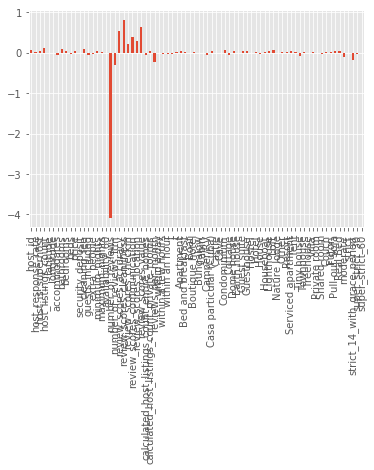

In [54]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df_data.columns)
weights.plot(kind='bar')
plt.show()

In [56]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [57]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)
##took longer to run

accuracy: 0.8475900423728814
[[4845  469]
 [ 682 1556]]


In [58]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(12944, 76)
(12944,)
[6597 6347]


In [59]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_data.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['perf_score'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df_data['perf_score'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12944 entries, 4479 to 33887
Data columns (total 77 columns):
host_id                                         12944 non-null int64
host_response_rate                              12944 non-null float64
host_is_superhost                               12944 non-null uint8
host_listings_count                             12944 non-null float64
latitude                                        12944 non-null float64
longitude                                       12944 non-null float64
accommodates                                    12944 non-null int64
bathrooms                                       12944 non-null float64
bedrooms                                        12944 non-null float64
beds                                            12944 non-null float64
price                                           12944 non-null float64
security_deposit                                12944 non-null float64
cleaning_fee                              

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
